In [2]:

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

with open("../datasets/rotten_tomatoes_movies_data_with_score_panels.json", "r") as fp:
    data = json.load(fp)
    
print(len(data))


In [ ]:
def append_row(df, row):
    return pd.concat([
        df, 
        pd.DataFrame([row], columns=row.index)]
    ).reset_index(drop=True)



## Movie_Data_2k:

- This is smallest, yet most comprehensive version of the collected information w.r.t. to the comprehensiveness of columns related to features and network data

In [ ]:


issues = []
errors = []


movies_data_2k = pd.DataFrame(
    columns=[
        'Title', 'Synopsis', 'Original Language', 'Runtime', 
        'Director', 'Producer', 'Writer', 'Top Cast',
        'Distributor', 'Production Co', 
        'Box Office (Gross USA)', 
        'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
        'Release Date (Theaters)', 'Release Date (Streaming)', 'Link'

    ]
)


for k, v in data.items():
    try:
        run_time =  int(v['Info']['Runtime'].split()[0].split("h")[0]) * 60 + int(v['Info']['Runtime'].split()[1].split("m")[0])
        tmp_box_office = v['Info']['Box Office (Gross USA)'].strip().split("$")[1]
        
        if "M" in tmp_box_office:
            box_office = float(tmp_box_office.split("M")[0]) * 1000000
        elif "K" in tmp_box_office:
            box_office = float(tmp_box_office.split("K")[0]) * 1000
        else:
            box_office = 0.
        a_row = pd.Series({
            'Title': v['Title'].strip(),
            'Synopsis': v['Synopsis'], 
            'Original Language': v['Info']['Original Language'].strip(), 
            'Runtime': run_time,
            'Director': v['Info']['Director'].strip(), 
            'Producer': v['Info']['Producer'].strip(), 
            'Writer':  v['Info']['Writer'].strip(),
            'Top Cast': v["Top Cast"], 
            'Distributor': v['Info']['Distributor'].strip(),
            'Production Co': v['Info']['Production Co'].strip(),
            'Box Office (Gross USA)': box_office, 
            'Tomato Meter': float(v["Score Panel"][2].strip("%"))/100,
            'Audience Score': float(v["Score Panel"][5].strip("%"))/100,
            'No. Reviews': int(v["Score Panel"][4].split(" ")[0]),
            'All Genres': v['Info']['Genre'].strip(), 
            'Genre': v['Info']['Genre'].strip().split(", ")[0],
            'Release Date (Theaters)': v['Info']['Release Date (Theaters)'].strip(),
            'Release Date (Streaming)': v['Info']['Release Date (Streaming)'].strip(), 
            'Link': k.strip()
        })
        movies_data_2k = append_row(df=movies_data_2k, row=a_row)
    except Exception as error:
        print(
            f"In {k} \n"
            f"{error} \n"
            f"occurred !"
        )
        issues.append(k)
        errors.append(error)
        
        
                

In [ ]:



languages = list(movies_data_2k["Original Language"].unique())
for language in languages:
    movies_data_2k['Original Language'].replace(language, language[:3], inplace=True)
    

In [ ]:

movies_data_2k.shape 



In [ ]:

errors = [str(e) for e in errors ]
errors = [str(e) for e in errors if "invalid literal" not in e ]  # remove run-time errors for movies shorter an hour
plt.figure(figsize=(17, 5))
plt.hist(errors)
plt.show()




In [ ]:

movies_data_2k

In [ ]:


movies_data_2k.shape



In [ ]:


movies_data_2k.to_csv("../datasets/movies_data_2k.csv", index=False)



## Movie_Data_4k:

- The "Box office", "Distributer" , "Production Co.", "Release Date (Theaters)" and "Release Date (Streaming)" are dropped from the set of features to increase the number of data points

- The "Producer" is also drop from the corresponding network columns to increase the number of data points.

In [ ]:




issues_4k = []
errors_4k = []


movies_data_4k = pd.DataFrame(
    columns=[
        'Title', 'Synopsis', 'Original Language', 'Runtime', 
        'Director', 
#         'Writer', 
        'Top Cast',
        'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
        'Link'

    ]
)



for k, v in data.items():
    try:
        run_time =  int(v['Info']['Runtime'].split()[0].split("h")[0]) * 60 + int(v['Info']['Runtime'].split()[1].split("m")[0])
        a_row = pd.Series({
            'Title': v['Title'].strip(),
            'Synopsis': v['Synopsis'].strip(), 
            'Original Language': v['Info']['Original Language'].strip(), 
            'Runtime': run_time,
            'Director': v['Info']['Director'].strip(), 
#             'Writer':  v['Info']['Writer'].strip(),
            'Top Cast': v["Top Cast"], 
            'Tomato Meter': float(v["Score Panel"][2].strip("%"))/100,
            'Audience Score': float(v["Score Panel"][5].strip("%"))/100,
            'No. Reviews': int(v["Score Panel"][4].split(" ")[0]),
            'All Genres': v['Info']['Genre'].strip(), 
            'Genre': v['Info']['Genre'].strip().split(", ")[0],
            'Link': k.strip()
        })
        movies_data_4k = append_row(df=movies_data_4k, row=a_row)
    except Exception as error:
        print(
            f"In {k} \n"
            f"{error} \n"
            f"occurred !"
        )
        issues_4k.append(k)
        errors_4k.append(error)
        
        
                

In [ ]:

errors_4k = [str(e) for e in errors_4k ]
# removing run errors for movies shorter an hour
errors_4k = [str(e) for e in errors_4k if "invalid literal" not in e ]  

plt.figure(figsize=(17, 5))
plt.hist(errors_4k)
plt.show()




In [ ]:

set(errors_4k)



In [ ]:

movies_data_4k.shape



In [ ]:

movies_data_4k


In [ ]:



languages = list(movies_data_4k["Original Language"].unique())
for language in languages:
    movies_data_4k['Original Language'].replace(language, language[:3], inplace=True)
    

In [ ]:



movies_data_4k.to_csv("../datasets/movies_data_4k.csv", index=False)



# EDA

In [3]:

movies_data_s = pd.read_csv("../datasets/movies_data_2k.csv", )
movies_data_m = pd.read_csv("../datasets/movies_data_4k.csv", )

print(movies_data_s.shape, movies_data_m.shape)


(2262, 19) (4245, 12)


## Data with around 2,000 movies

In [5]:


features_s = [
    'Title', 'Synopsis', 'Original Language', 'Runtime', 
    'Director', 'Producer', 'Writer', 'Top Cast',
    'Distributor', 'Production Co', 
    'Box Office (Gross USA)', 
    'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
    'Release Date (Theaters)', 'Release Date (Streaming)', 'Link'
]

q_features_s = ['Runtime', 'Box Office (Gross USA)', 'Tomato Meter', 'Audience Score', 'No. Reviews', ]

c_features_s = ['Original Language', 'Genre',]

network_columns_s = [ 'Director', 'Producer', 'Writer', 'Top Cast']



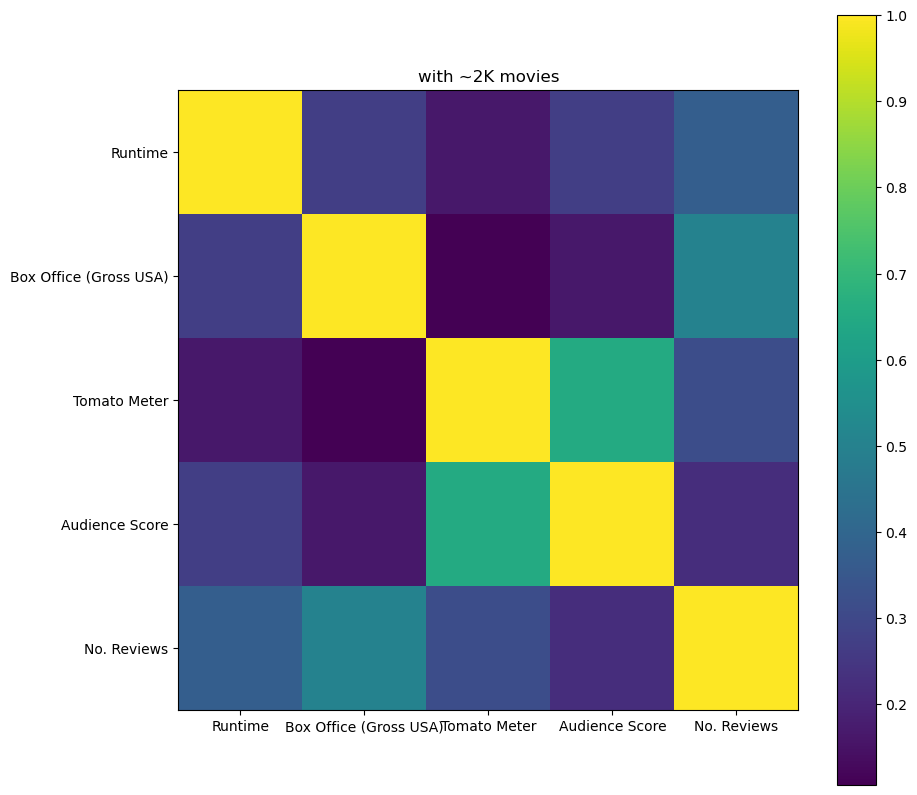

In [6]:



corr_s = movies_data_s[q_features].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_s)
plt.xticks(range(len(corr_s.columns)), corr_s.columns)
plt.yticks(range(len(corr_s.columns)), corr_s.columns)
plt.colorbar()
plt.title("with ~2K movies")
plt.show()



In [7]:

movies_data_s["Genre"].unique()



array(['Musical', 'Action', 'Biography', 'Adventure', 'Sci-fi',
       'Mystery & thriller', 'Horror', 'Comedy', 'Fantasy', 'Drama',
       'Western', 'Romance', 'War', 'Crime', 'Kids & family', 'History',
       'Holiday', 'Documentary'], dtype=object)

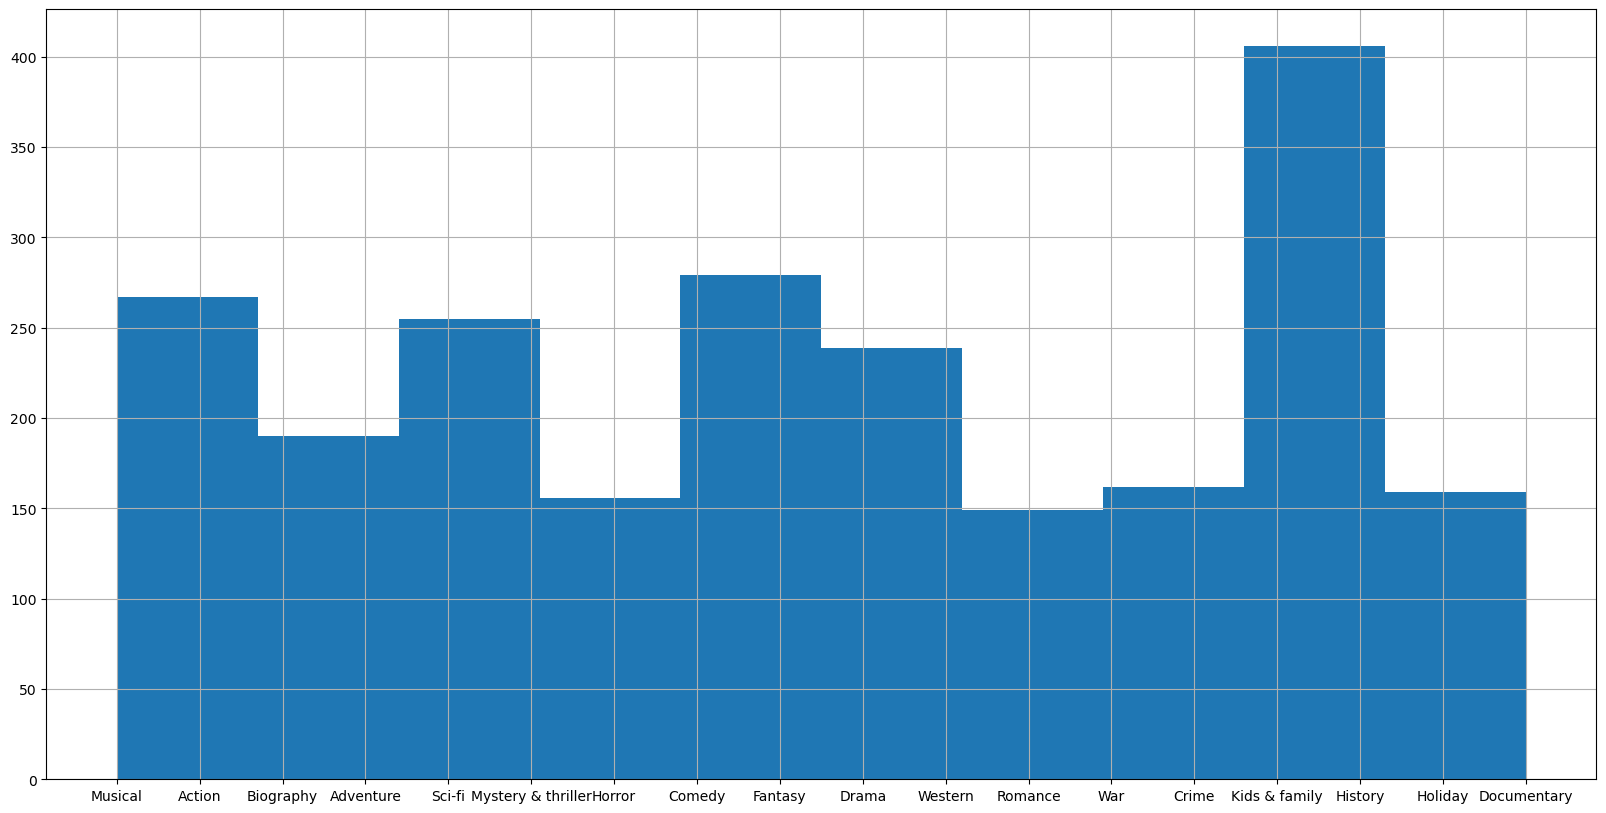

In [8]:

plt.figure(figsize=(20, 10))
movies_data_s["Genre"].hist()
plt.show()


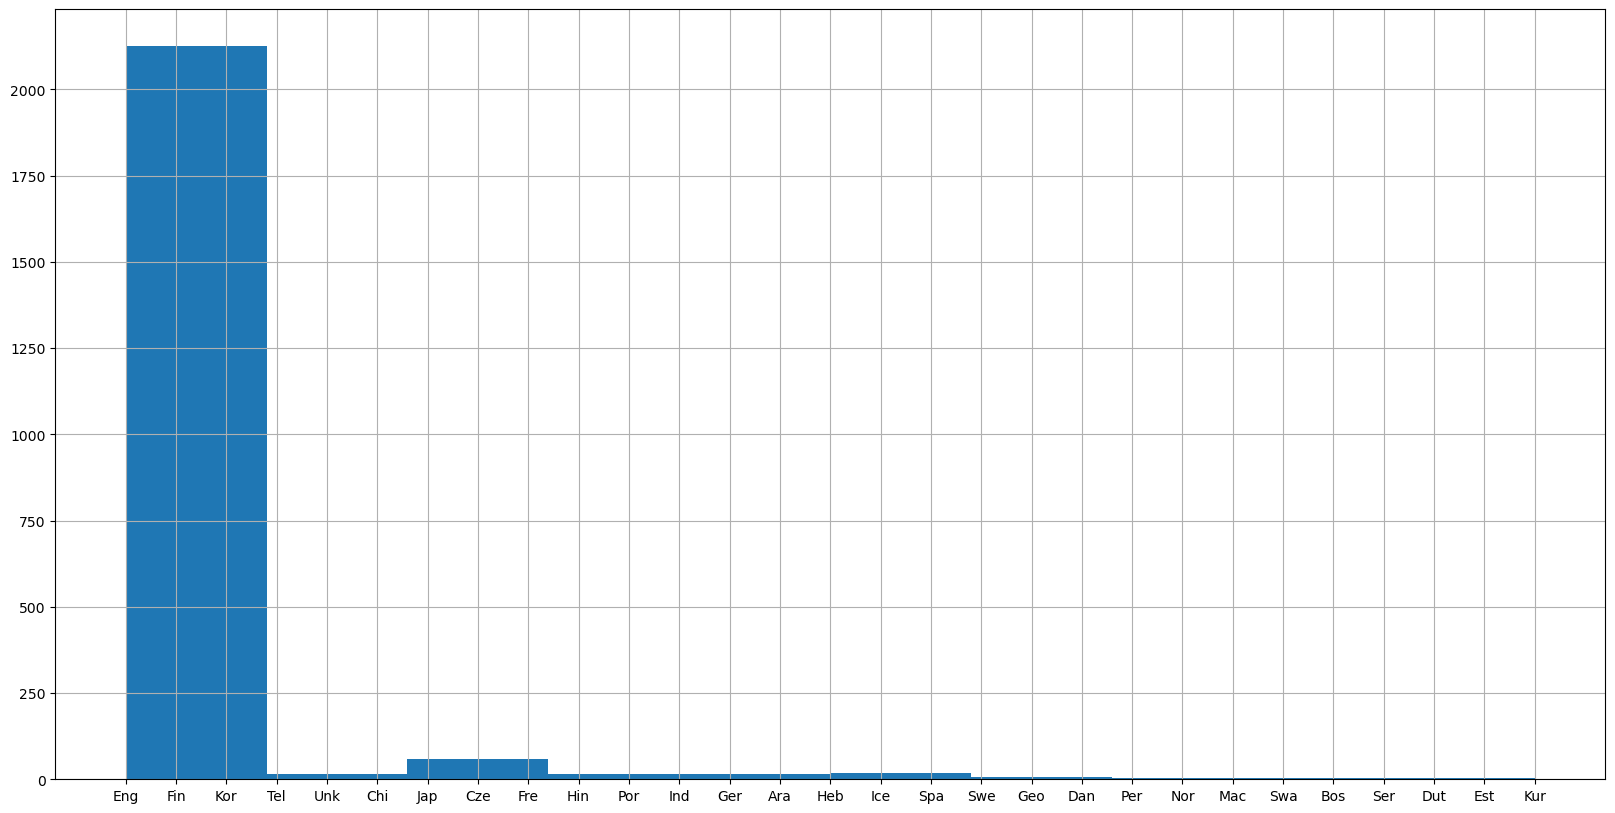

In [12]:

plt.figure(figsize=(20, 10))
movies_data_s["Original Language"].hist()
plt.show()




<Figure size 1000x1000 with 0 Axes>

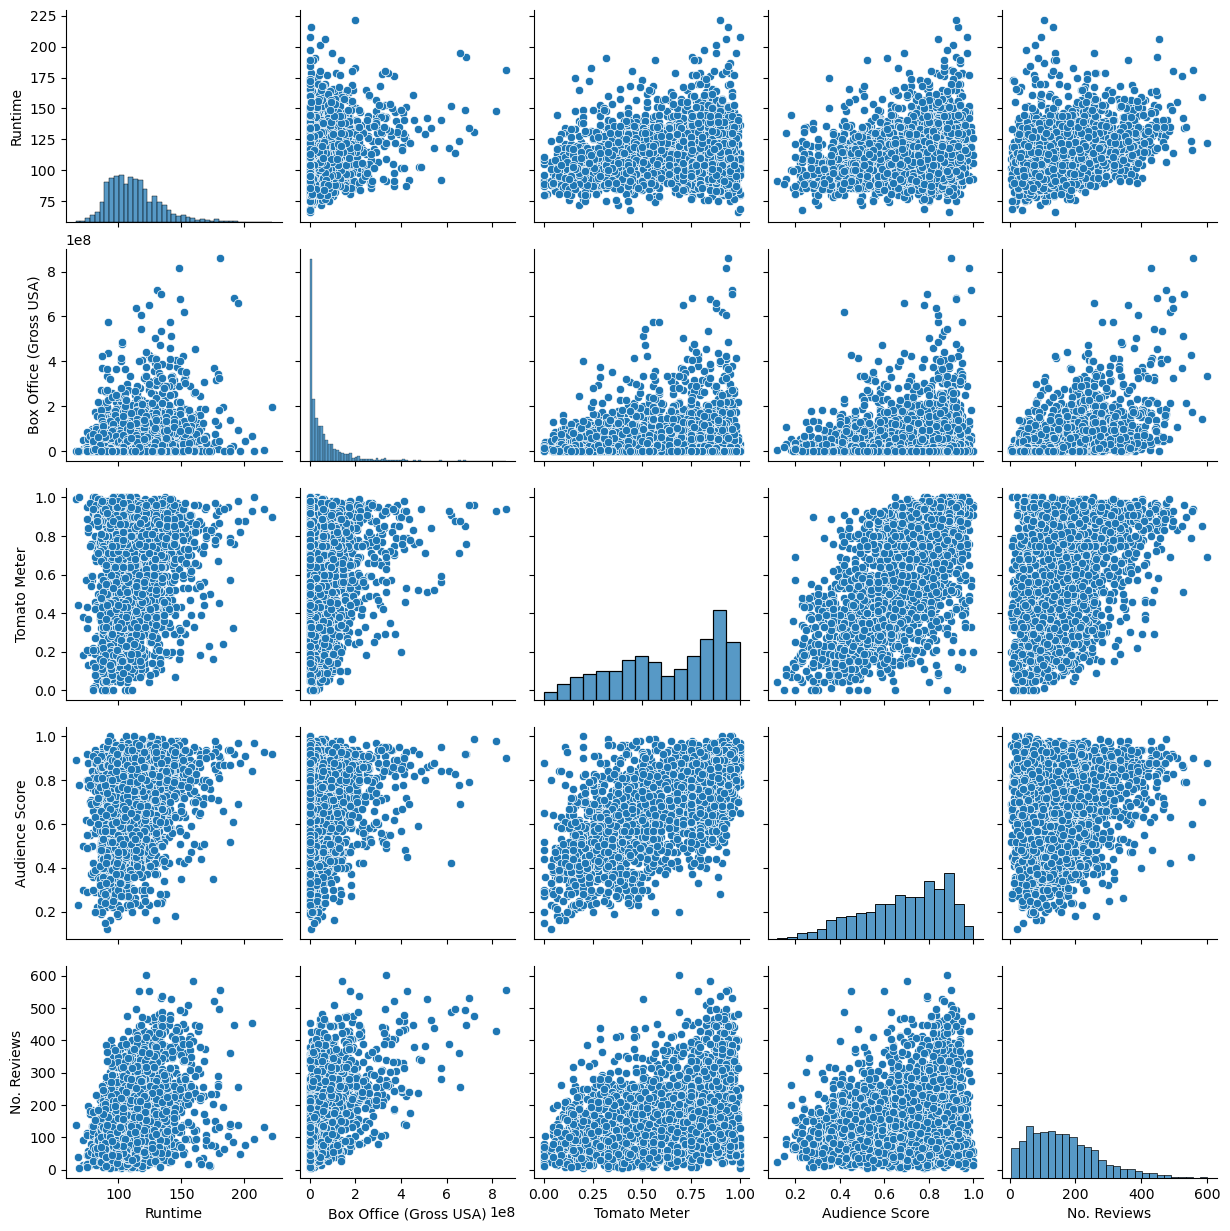

In [11]:

plt.figure(figsize=(10, 10))
sns.pairplot(movies_data_s[q_features])
plt.show()
